# Imputing

## Imports

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Datengrundlage

In [2]:
data = load_iris()
x_original = data["data"]
y = data["target"]
x = x_original.copy()

## Daten zufällig entfernen

In [3]:
remove_n = 20
rows = np.random.randint(0,x.shape[0],size=remove_n)
cols = np.random.randint(0,x.shape[1],size=remove_n)

In [4]:
for ri,ci in zip(rows,cols):
    x[ri,ci] = np.nan

In [5]:
print("{} von {} Werten fehlen".format(np.count_nonzero(np.isnan(x)),x.size))

20 von 600 Werten fehlen


## Daten in Test- und Trainingsdaten teilen
Auch bei fehlenden Werte müssen die Daten stets zuerst in Test- und Trainingsdaten geteilt werden. Die Methoden zum Imputing werden dabei nur auf den Trainingsdaten erstellt und dann auf die Testdaten angewandt

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=45)

In [7]:
print("{} von {} Werten im Trainingsdatensatz fehlen".format(np.count_nonzero(np.isnan(x_train)),x_train.size))
print("{} von {} Werten im Testdatensatz fehlen".format(np.count_nonzero(np.isnan(x_test)),x_test.size))

11 von 400 Werten im Trainingsdatensatz fehlen
9 von 200 Werten im Testdatensatz fehlen


## Imputer trainieren und anwenden

In [8]:
mean = np.mean(x_train,axis=0)
mean

array([5.868,   nan,   nan,   nan])

In [9]:
imputer = SimpleImputer()
imputer.fit(x_train)
x_train = imputer.transform(x_train)
x_test = imputer.transform(x_test)

In [10]:
x_train[:20]

array([[4.8, 3. , 1.4, 0.3],
       [5.6, 3. , 4.5, 1.5],
       [6.4, 2.8, 5.6, 2.1],
       [5.3, 3.7, 1.5, 0.2],
       [6.7, 3.3, 5.7, 2.5],
       [5.1, 3.8, 1.5, 0.3],
       [4.7, 3.2, 1.6, 0.2],
       [5.6, 2.7, 4.2, 1.3],
       [4.6, 3.2, 1.4, 0.2],
       [5.5, 2.6, 4.4, 1.2],
       [6.3, 2.5, 4.9, 1.5],
       [6. , 3. , 4.8, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [6.9, 3.1, 5.1, 2.3],
       [4.7, 3.2, 1.3, 0.2],
       [5.1, 3.4, 1.5, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [5.1, 3.3, 1.7, 0.5],
       [6.1, 2.8, 4. , 1.3],
       [5. , 3.4, 1.5, 0.2]])

In [11]:
print("{} von {} Werten im Trainingsdatensatz fehlen".format(np.count_nonzero(np.isnan(x_train)),x_train.size))
print("{} von {} Werten im Testdatensatz fehlen".format(np.count_nonzero(np.isnan(x_test)),x_test.size))

0 von 400 Werten im Trainingsdatensatz fehlen
0 von 200 Werten im Testdatensatz fehlen


## Imputed Werte sind den realen Werten statistisch gesehen nah

In [12]:
mean_squared_error(imputer.transform(x),x_original)

0.029039541749106133

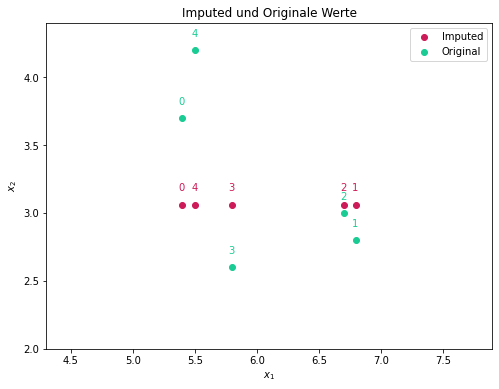

In [13]:
plt.figure(figsize=(8,6))
label_imputed, label_original = "", ""
for i in range(5):
    # Plot Labels nur einmal
    if i == 4:
        label_imputed="Imputed"
        label_original="Original"
        
    # Errechne die fehlenden Werte
    x1,x2 = imputer.transform(x)[rows[np.where(cols<=1)][i],:1], imputer.transform(x)[rows[np.where(cols<=1)][i],1:2]
    
    # Plotte die Imputed Werte und fortlaufende Nummer
    plt.scatter(x1,x2,c="#CC1B58",label=label_imputed)
    plt.text(x1-0.03,x2+0.1,str(i),c="#CC1B58")
    
    # Plotte die originalen Werte und fortlaufende Nummmder
    plt.scatter(x_original[rows[np.where(cols<=1)][i],:1],x_original[rows[np.where(cols<=1)][i],1:2],c="#1ACC94",label=label_original)
    plt.text(x_original[rows[np.where(cols<=1)][i],:1]-0.03,x_original[rows[np.where(cols<=1)][i],1:2]+0.1,str(i),c="#1ACC94")
    
# Plot beschreiben
plt.xlim(np.min(x_original[:,:1]),np.max(x_original[:,:1]))
plt.ylim(np.min(x_original[:,1:2]),np.max(x_original[:,1:2]))
plt.title("Imputed und Originale Werte")
plt.legend()
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

## kNN Imputer verwenden

In [14]:
knn_imputer = KNNImputer()
knn_imputer.fit(x_train)
x_train = knn_imputer.transform(x_train)
x_test = knn_imputer.transform(x_test)

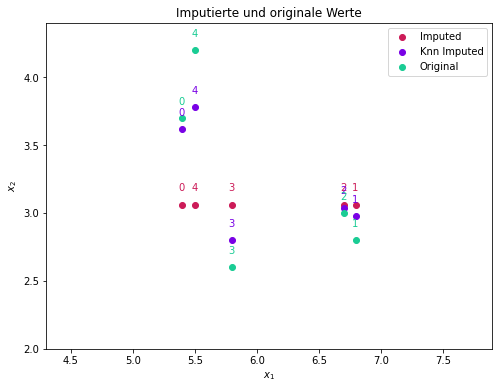

In [15]:
plt.figure(figsize=(8,6))
label_imputed, label_original, label_knn_imputed = "", "", ""
for i in range(5):
    # Plot Labels nur einmal
    if i == 4:
        label_imputed="Imputed"
        label_knn_imputed="Knn Imputed"
        label_original="Original"
        
    # Errechne die fehlenden Werte
    x1,x2 = imputer.transform(x)[rows[np.where(cols<=1)][i],:1], imputer.transform(x)[rows[np.where(cols<=1)][i],1:2]
    
    # Plotte die Imputed Werte und fortlaufende Nummer
    plt.scatter(x1,x2,c="#CC1B58",label=label_imputed)
    plt.text(x1-0.03,x2+0.1,str(i),c="#CC1B58")
    
    # Errechne die fehlenden Werte
    knnx1,knnx2 = knn_imputer.transform(x)[rows[np.where(cols<=1)][i],:1], knn_imputer.transform(x)[rows[np.where(cols<=1)][i],1:2]
    
    # Plotte die Imputed Werte und fortlaufende Nummer
    plt.scatter(knnx1,knnx2,c="#7902E5",label=label_knn_imputed)
    plt.text(knnx1-0.03,knnx2+0.1,str(i),c="#7902E5")
    
    # Plotte die originalen Werte und fortlaufende Nummmder
    plt.scatter(x_original[rows[np.where(cols<=1)][i],:1],x_original[rows[np.where(cols<=1)][i],1:2],c="#1ACC94",label=label_original)
    plt.text(x_original[rows[np.where(cols<=1)][i],:1]-0.03,x_original[rows[np.where(cols<=1)][i],1:2]+0.1,str(i),c="#1ACC94")
    
# Plot beschreiben
plt.xlim(np.min(x_original[:,:1]),np.max(x_original[:,:1]))
plt.ylim(np.min(x_original[:,1:2]),np.max(x_original[:,1:2]))
plt.title("Imputierte und originale Werte")
plt.legend()
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()